<a href="https://colab.research.google.com/github/puraminy/mini_proj3/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Alphabets Dataset

Cloning into 'mini_proj3'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 173 (delta 18), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (173/173), 6.42 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (83/83), done.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


((500, 784), (500,), 7, 0)

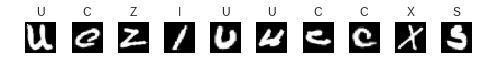

In [1]:
#!git clone "https://github.com/puraminy/mini_proj3"
!rm -r 'mini_proj3'
!git clone "https://github.com/puraminy/mini_proj3"
from mini_proj3.mysom import MiniSom

import numpy as np
alphabet = np.load('mini_proj3/Alphabets.npy')
label = np.load('mini_proj3/Alphabet_labels.npy')
label2 = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z']


import matplotlib.pyplot as plt
idx = np.random.randint(499, size=10)

fig, axes = plt.subplots(1, 10)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=None, wspace=0.5)

# for i in range(len(alphabet)):
#   alphabet[i] = alphabet[i] * (255.0 / alphabet[i].max())

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
alphabet = sc.fit_transform(alphabet)
  
pltalpha = alphabet[idx,:]
pltlbl = label[idx]

for i in range(10):
  axes[i].imshow(-1*np.reshape(pltalpha[i,:],[28,28]))
  axes[i].axis('off')
  xlabel = label2[pltlbl[i]]; axes[i].set_title(xlabel)



alphabet.shape, label.shape, max(label), min(label)


#SOM

##Constant Parameters

In [2]:
features = 28*28
learningrate = 1
# ini_weights (1) PCA
#som0 = MiniSom(x=25, y=25, input_len=features)  # initialization of 25x25 SOM
#som0.pca_weights_init(alphabet)
#ini_weights = som0._weights.copy()

# ini_weights (2) Distribute from min to max value of input data [0:1]    
#ini_weights = np.expand_dims(np.linspace(0, 1, x*y),axis=1)*np.ones([1,features])
#ini_weights = np.reshape(ini_weights, [x, y, features])

# ini_weights (3) Input mean values    
#ini_weights = np.expand_dims(np.mean(alphabet,axis=0),axis=1)*np.ones([1,x*y])
#ini_weights = np.reshape(weights, [x, y, features])

# ini_weights (4) Random
#ini_weights = np.random.random([x,y,features])
som0 = MiniSom(x=25, y=25, input_len=features)  # initialization of 25x25 SOM
som0.random_weights_init(alphabet)
ini_weights = som0._weights.copy()

# ini_weights (5) Zeros
#ini_weights = np.zeros([x,y,features])

# ini_weights (6) Ones
#ini_weights = np.ones([x,y,features])
print(ini_weights)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [3]:
max_iter = 50
learning_rate = 1
eta = learning_rate
for t in range(max_iter):
  eta1 = learning_rate / (1+t/(max_iter/2))
  eta2 = learning_rate * np.exp(-t / max_iter)
  eta3 = learning_rate * np.exp(-t*0.01)

  print(eta3)

1.0
0.9900498337491681
0.9801986733067553
0.9704455335485082
0.9607894391523232
0.951229424500714
0.9417645335842487
0.9323938199059483
0.9231163463866358
0.9139311852712282
0.9048374180359595
0.8958341352965282
0.8869204367171575
0.8780954309205613
0.8693582353988059
0.8607079764250578
0.8521437889662113
0.8436648165963837
0.835270211411272
0.8269591339433623
0.8187307530779818
0.8105842459701871
0.8025187979624785
0.794533602503334
0.7866278610665535
0.7788007830714049
0.7710515858035663
0.7633794943368531
0.7557837414557255
0.7482635675785653
0.7408182206817179
0.7334469562242892
0.7261490370736909
0.7189237334319262
0.7117703227626097
0.7046880897187134
0.697676326071031
0.6907343306373547
0.6838614092123558
0.6770568744981647
0.6703200460356393
0.6636502501363194
0.6570468198150567
0.6505090947233165
0.6440364210831414
0.6376281516217733
0.631283645506926
0.6250022682827008
0.6187833918061408
0.6126263941844161


#Part A

In [10]:
def decay_lr(lr, t, max_iter):
#   return lr * np.exp(-t*0.01)
  ret = lr / (1+t/(max_iter/2))
  print("ret:", ret)
  return ret
  
def decay_sigma(sigma, t, max_iter):
#   return sigma * np.exp(-t*0.01)
  return sigma / (1+t/(max_iter/2))

def test(func=None):
  if func != None:
    func(1,5, 100)

test(decay_lr)

ret: 0.9090909090909091


 [    0 / 2000 ]   0% ? it/sret: 1.0
iteration= 0 delta = 1.207877903095171e-19


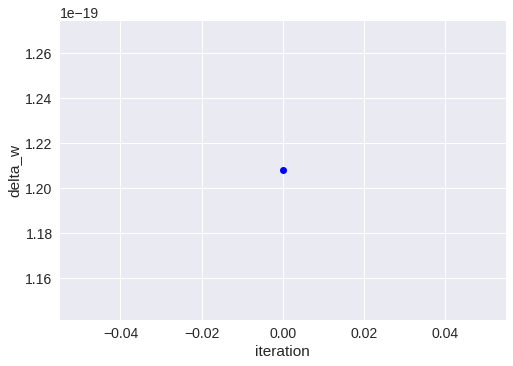

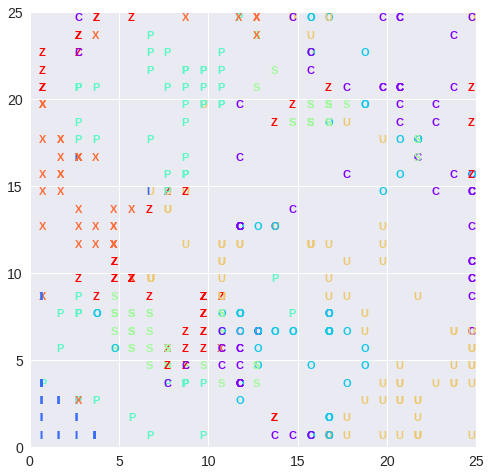

Number of Winning Nodes: 241


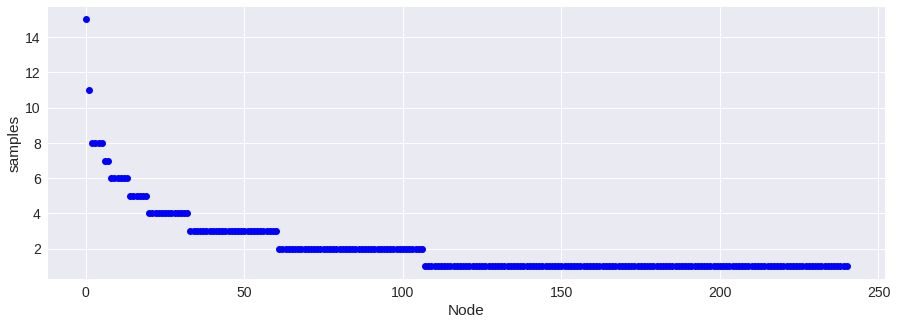

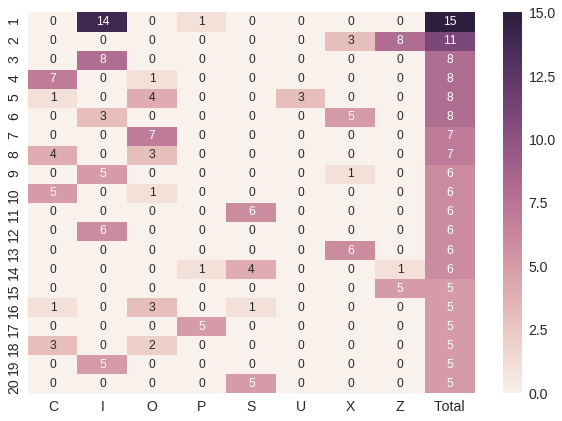

In [11]:


x = 25; y = 25
ini_weights = np.reshape(ini_weights,[x,y,features])
radius = 0

#neighborhood='mexican_hat'
#neighborhood='bubble'
#neighborhood='gaussian'
neighborhood='triangle'

somA = MiniSom(x=x, y=y, input_len=features, sigma=radius, learning_rate=learningrate, neighborhood_function=neighborhood)
somA._weights = ini_weights
#somA.random_weights_init(alphabet)  # initialize weights with random values 
somA.train_delta(alphabet, delta=0.0001, max_iteration=2000, verbose=True, 
                 decay_lr=decay_lr, 
                 decay_sigma=decay_sigma)

weightsA = somA._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somA.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsA.shape[0], 0,  weightsA.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somA.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

plt.figure(figsize=(15, 5))
for i in range(len(mappings)):
  plt.plot(i, len(np.flipud(sorted_values)[i]),'bo')
  plt.xlabel('Node')
  plt.ylabel('samples')
  
  
if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1

result_mat = np.flipud(result_mat)

import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()


#Part B

/content/mini_proj3/mysom.py:119: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [    0 / 2000 ]   0% ? it/siteration= 0 delta = 0.00020355339277688573
 [    1 / 2000 ]   0% 0.03273 it/siteration= 1 delta = 0.00022935247332376868
 [    2 / 2000 ]   0% 0.02436 it/siteration= 2 delta = 0.00023685848869131252
 [    3 / 2000 ]   0% 0.02156 it/siteration= 3 delta = 0.00021648918958796294
 [    4 / 2000 ]   0% 0.02004 it/siteration= 4 delta = 0.0002168811184807773
 [    5 / 2000 ]   0% 0.01921 it/siteration= 5 delta = 0.000233256234303993
 [    6 / 2000 ]   0% 0.01865 it/siteration= 6 delta = 0.0002884219063258992
 [    7 / 2000 ]   0% 0.01818 it/siteration= 7 delta = 0.00022932129204347157
 [    8 / 2000 ]   0% 0.01797 it/siteration= 8 delta = 0.00022842150322574493
 [    9 / 2000 ]   0% 0.01773 it/siteration= 9 delta = 0.00023282247709514875
 [   10 / 2000 ]   0% 0.01753 it/siteration= 10 delta = 0.00025576575106933344
 [   11 / 2000 ]   1% 0.01771 it/siteration= 11 delta = 0.0001906398067036642
 [   12 / 2000 ]   1% 0.01796 it/siteration= 12 delta = 0.000212659689320

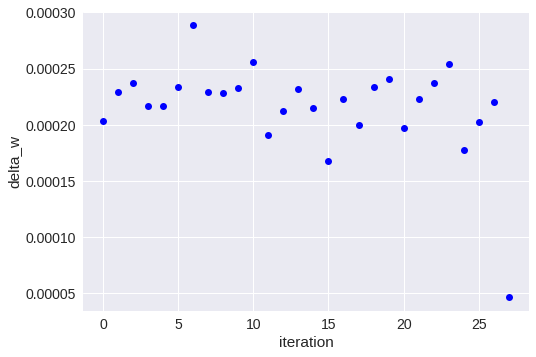

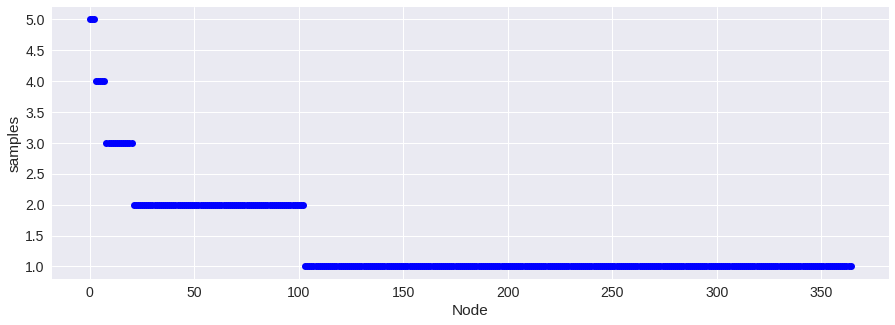

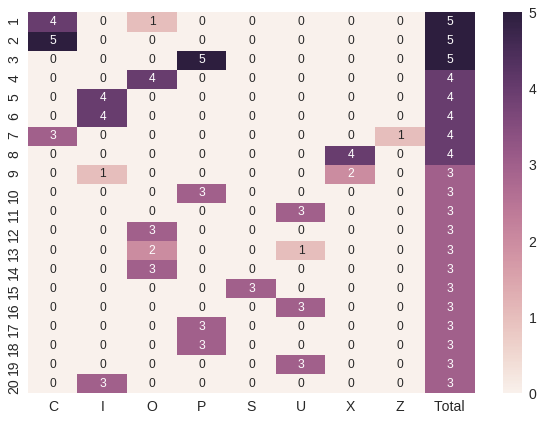

In [5]:
x = 625; y = 1
ini_weights = np.reshape(ini_weights,[x,y,features])
radius = 1

#neighborhood='mexican_hat'
#neighborhood='bubble'
neighborhood='gaussian'
#neighborhood='triangle'

somB = MiniSom(x=x, y=y, input_len=features, sigma=radius, learning_rate=learningrate, neighborhood_function=neighborhood) 
somB._weights = ini_weights
#somB.random_weights_init(alphabet)  # initialize weights with random values 
somB.train_delta(alphabet, delta=0.0001, max_iteration=2000, verbose=True)

weightsB = somB._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somB.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsB.shape[0], 0,  weightsB.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somB.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

plt.figure(figsize=(15, 5))
for i in range(len(mappings)):
  plt.plot(i, len(np.flipud(sorted_values)[i]),'bo')
  plt.xlabel('Node')
  plt.ylabel('samples')
  
if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1

result_mat = np.flipud(result_mat)

import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()


#Part C

 [    0 / 2000 ]   0% ? it/siteration= 0 delta = 0.0018703927366586154
 [    1 / 2000 ]   0% 0.03144 it/siteration= 1 delta = 0.001734250393437369
 [    2 / 2000 ]   0% 0.02364 it/siteration= 2 delta = 0.0014380706900219246
 [    3 / 2000 ]   0% 0.02113 it/siteration= 3 delta = 0.0016287909825623277
 [    4 / 2000 ]   0% 0.01983 it/siteration= 4 delta = 0.0013636174603038967
 [    5 / 2000 ]   0% 0.01916 it/siteration= 5 delta = 0.0009445429057001568
 [    6 / 2000 ]   0% 0.01861 it/siteration= 6 delta = 0.0015998723812223838
 [    7 / 2000 ]   0% 0.01824 it/siteration= 7 delta = 0.0013021304916275428
 [    8 / 2000 ]   0% 0.01792 it/siteration= 8 delta = 0.0018111118784800632
 [    9 / 2000 ]   0% 0.01769 it/siteration= 9 delta = 0.0009703570933283295
 [   10 / 2000 ]   0% 0.01749 it/siteration= 10 delta = 0.00155908022563379
 [   11 / 2000 ]   1% 0.01735 it/siteration= 11 delta = 0.0006170357465295411
 [   12 / 2000 ]   1% 0.01764 it/siteration= 12 delta = 0.0019466978508184255
 [   

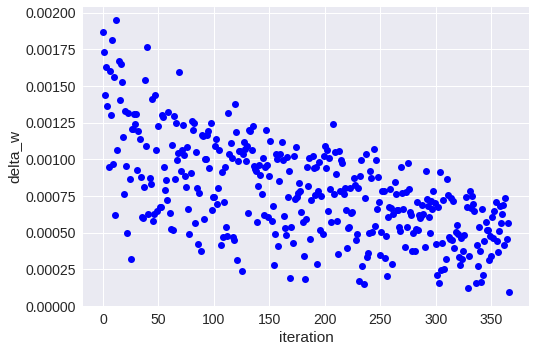

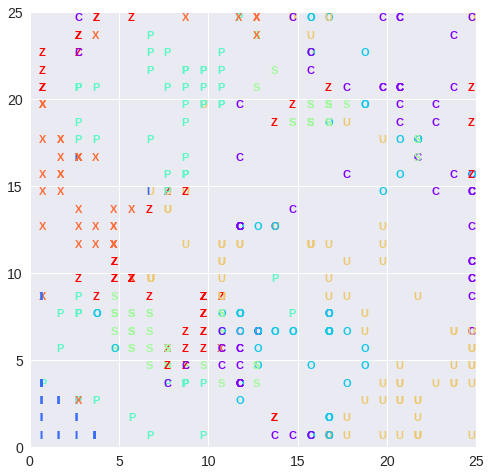

Number of Winning Nodes: 241


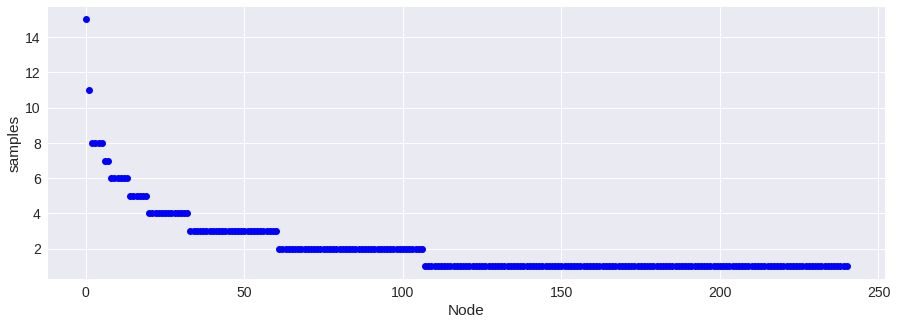

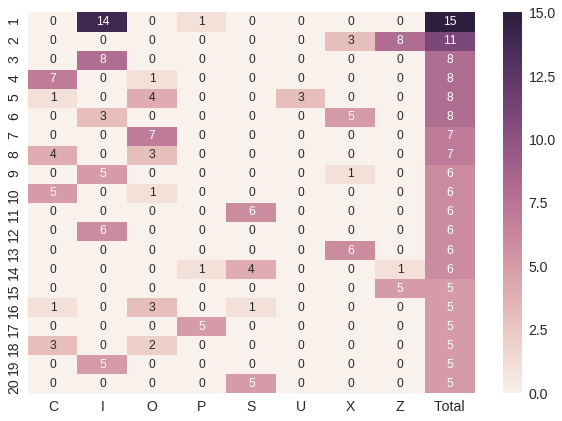

In [6]:
x = 25; y = 25
ini_weights = np.reshape(ini_weights,[x,y,features])
radius = 1

#neighborhood='mexican_hat'
#neighborhood='bubble'
neighborhood='gaussian'
#neighborhood='triangle'

somC = MiniSom(x=x, y=y, input_len=features, sigma=radius, learning_rate=learningrate, neighborhood_function=neighborhood) 
somC._weights = ini_weights
#somC.random_weights_init(alphabet)  # initialize weights with random values 
somC.train_delta(alphabet, delta=0.0001, max_iteration=2000, verbose=True)

weightsC = somC._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somC.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsC.shape[0], 0,  weightsC.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somC.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

plt.figure(figsize=(15, 5))
for i in range(len(mappings)):
  plt.plot(i, len(np.flipud(sorted_values)[i]),'bo')
  plt.xlabel('Node')
  plt.ylabel('samples')

if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1

result_mat = np.flipud(result_mat)

import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()
